<a href="https://colab.research.google.com/github/kclassie/ML_sundries/blob/main/Embedding_%D0%BF%D0%BE%D1%88%D0%B0%D0%B3%D0%BE%D0%B2%D0%BE%D1%8E_%D0%9A%D0%BE%D0%BD%D1%81%D0%BF%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Некоторые модели очень тяжелые, поэтому советую пользоваться Google Colab. Ссылка на ноутбук в коллабе:

https://colab.research.google.com/drive/1mD6G0RN2tPAPE5CQcDaRCXiPA63ag8OY

#  <center> Word embeddings <center>

**Word embedding** -  technique in NLP where words or phrases from the vocabulary are mapped to vectors of real numbers.

Called an **"embedding"** because it's embedded into a space

## Two kinds of embeddings
**Sparse** (e.g. TF-IDF, One-Hot-Enc, PPMI)
- a common baseline model
- Sparse vectors
- Words are represented by a simple function of the counts of nearby words

**Dense** (e.g. word2vec, doc2vec)
- Dense vectors
- Representation is created by training a classifier to distinguish nearby and far-away words

In [ ]:
#Example of vector represenation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict
%matplotlib inline


# Lets for example consider a simple way to map words from sentences into dense vectors.
# Lets make a table with words coocurrencies and then project vectors of all words into 2D using PCA.

s = ['Sky is blue', 'She is getting better', 'Everything is possible']
dic = defaultdict(dict)
for sent in s:
    words = sent.split()
    for w in words:
        for w2 in words:
            dic[w][w2]=1

df = pd.DataFrame(dic)
df.fillna(0, inplace=True)
df

,Sky,is,blue,She,getting,better,Everything,possible
Sky,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
is,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0
blue,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
She,0.0,1,0.0,1.0,1.0,1.0,0.0,0.0
getting,0.0,1,0.0,1.0,1.0,1.0,0.0,0.0
better,0.0,1,0.0,1.0,1.0,1.0,0.0,0.0
Everything,0.0,1,0.0,0.0,0.0,0.0,1.0,1.0
possible,0.0,1,0.0,0.0,0.0,0.0,1.0,1.0


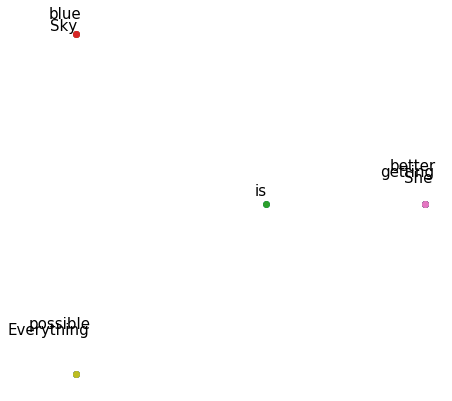

In [ ]:
res = PCA().fit_transform(df)

font = {'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(7,7))
plt.scatter(res[:,0], res[:,1])
plt.axis('off')
for i, label in enumerate(df.columns):
    x, y = res[i,0], res[i,1]
    plt.scatter(x, y)
    annot = {'has': (1, 50), 'is': (1, 5)}
    plt.annotate(label, xy=(x, y),
                 xytext=annot.get(label,(1+i*2, 6*i)), 
                 textcoords='offset points',
                   ha='right', va='bottom', )

 - **Each word = a vector**
 - **Similar words are “nearby in space”**

# Что такое Word2Vec?

**Idea:** predict rather than count (*Mikolov et al., 2013)

Instead of counting how often each word w occurs near "apricot” train a classifier on a binary prediction task:

–Is w likely to show up near "apricot"?

Word2Vec – одна из технологий анализа семантики естественных языков, которая основана на векторном представлении слов согласно их семантической близости. Был разработан группой исследователей Google в 2013 году, активно применяется для семантического анализа текстов и похожих задачах.
Word2vec в качестве входных данных принимает текстовый корпус и гиперпараметры, о которых поговорим позднее. Далее названия гиперпараметров и их дефолтные значения будут указаны в соответсвии с реализацией Word2Vec на open-source платформе Gensim.

Суть алгоритма заключается в том, что он каждому слову сопоставляет числовой вектор определенной длины таким образом, чтобы близкие слова соответствуют близким векторам. Мерой близости слов выступает их контекстная близость т.е. близкие слова встречаются в тексте рядом с одинаковыми словами. 

Например слова "девушка" и "женщина" будут часто употреблятся со словами: "красивая", "прекрасная", "чудесная", "заботливая", а слова "мужчина" и "парень" будут часто употреблятся со словами: "храбрый", "сильный", "смелый", "могучий".

<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lYXF0b29VRzEwaUU"/>

Расстоянием между векторами измеряется при помощи [косинусного сходства](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C) (cosine similarity). Косинусное сходство - это мера сходства между двумя векторами предгильбертового пространства, которая используется для измерения косинуса угла между ними. Косинусная мера между векторами x и y длины n вычисляется по формуле:

$$cos(\theta)=\frac{(x,y)}{|x| |y|}=\frac{\sum\limits_{i=1}^{n}x_i y_i}{\sqrt{\sum\limits_{i=1}^{n}x_i^2} \sqrt{\sum\limits_{i=1}^{n}y_i^2}}$$

Обучаясь, Word2Vec максимизирует косинусную меру близости между векторами слов, которые встречаются в похожих контекстах и минимизирует косинусную меру между словами, которые не встречаются рядом.Word2Vec получает на вход слово, а на выход передает координаты вектора, соответствующие данному слову.

Полученные вектора можно складывать или вычитать друг из друга, сохраняя семантические связи.

<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lVEFPakZIcGZWVzg"/>

Некоторый недостаток заключается в том, что мы не имеем понятия за что отвечают полученные признаки. Т.е. у нас нет интерпретации, как на картинке ниже. 

<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lX1FNTDNxcnFsWnc"/>

В Word2Vec можно использовать две различных архитектуры нейронной сети с помощью которых осуществляется перевод слова в вектор: 

- Continuous Bag of Words (CBOW);
- Skip-gram.

Выбор одной из этих моделей выполняется с помощью гиперпараметра ‘sg’. По умолчанию sg=0 и используется модель CBOW, при sg=1 используется модель Skip-gram.


Другим гиперпараметром является размер окна, в котором рассматривается контекст данного слова. В данной реализации используется параметр ‘window’, который определяет максимальное количество слов между данным словом и соседним внутри предложения. Слова стоящие от данного дальше этого значения не будут рассматриваться как его контекст. Какое слово стоит в тексте ближе , а какое дальше от данного слова, не учитывается, при условии, что оба слова попали в окно. Вот пример с параметром window = 2

<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lMXd0bjRDLUdLN2c"/>

<img src="https://drive.google.com/uc?export=download&id=1c50NoJDfmB_88WxYNy-lDqDLJhz4AwnV"/>

Еще один важный гиперпараметр ‘size’ - размерность векторов, соответствующих словам. Если его величина мала, то модель получается грубой и плохо отображает связь между словами внутри данного массива текстов. А при большом значении роль машинного обучения теряется, и сопоставление словам векторов может превратиться в унитарное кодирование слов (one-hot encoding).


Помимо этого есть такие параметры как:

alpha - начальный коэффициент скорости обучения (будет линейно падать в ходе обучения).

seed = семя для воспроизводимости результатов;

min_count = минимальная частота слова, чтобы оно было учтено; 

max_vocab_size = ограничение на выделение ОЗУ для словаря. 10млн. слов занимают примерно 1GB RAM;

workers = число ядер используемых для обучения, повышает скорость;

iter = число итераций на каждый текст (по умолчанию 5);

sorted_vocab = 1 (значение по умолчанию),то сортирует словарь по убыванию частоты перед назначением слову индекса.


# Архитектура нейронной сети

Теперь более подробно рассмотрим процесс обучения и архитектуру нейронных сетей.
Пусть $V$ - количество слов в словаре, $h$ - размер окна (количество соседних слов, рассматриваемых как контекст данного слова), $N$ - размерность искомых векторов. 


# word2vec: skip gram & cbow

Models __CBOW (Continuous Bag of Words)__ and __Skip gram__ were invented in the now distant 2013,
*article*:
[*Tomas Mikolov et al.*](https://arxiv.org/pdf/1301.3781v3.pdf)

* __CBOW__ Модель предсказывает пропущенное слово, используя контекст (окружающие слова).
* __skip gram__ модель обратная к _CBOW_. Она предсказывает контекст на основе выбранного слова.

* **Context** фиксированное количество слов слева и справа от выбранного слова (см. рисунок ниже). Длина контекста определяется параметром "window".
<img src="https://drive.google.com/uc?export=download&id=123tOrqr958DAwU60oW4nPccqr7JbnBF7"/>


Сравнение 2ух моделей
<img src="https://drive.google.com/uc?export=download&id=1AW7mMz3e6AyA0azAwvM40qGE2CnjJ7mS"/>


___

Существует много реализаций word2vec в т.ч. [gensim](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb).
И есть много обученных слов-векторов, которые уже готовы к использованию (Например, GloVe).
___


# Continuous Bag of Words (CBOW)

Когда данных мало лучше использовать CBOW. В данном подходе нейронная сеть предсказывает исходное слово по его контексту ($h$ соседним словам). Нейронная сеть состоит из трех слоев: входной, скрытый, выходной.

На вход сети подаются $h$ векторов размерности $V$: $x_i=(x_i^1,x_i^2,...,x_i^V), i=1...h$, где $x_i^j=1$, если данное слово является $j$-ым словом из словаря, $x_i^k=0$ для $k\neq j$. На выходе имеем один вектор размерности $V$: $y=(y^1,y^2,...,y^V)$. На обучающейся выборке $y^j=1$, если предсказываемое слово является $j$-ым словом из словаря, $y^k=0$ для $k\neq j$. То есть нейронная сеть имеет $h\times V$ нейронов на входном слое и $V$ нейронов на выходном слое.

На скрытом слое сети $N$ нейронов. Именно с помощью весов, расставленных перед нейронами этого слоя, мы получим координаты векторных представлений слов. Функция активации на скрытом уровне — линейная, на выходном уровне — софтмакс (softmax).

Сначала рассмотрим простейший случай, когда  $h=1$.То есть будем предсказывать слово $y$ только по одному его соседу $x$. Тогда архитектура сети примет вид, изображенный на схеме:


<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lTUlzUENwVEl3azg"/>

Обозначим веса между входным и скрытым уровнями за $W$ - матрица размерности $V\times N$. Учитывая, что функция активации на скрытом слое линейная, вектор выходов размерности $N$ на скрытом уровне имеет вид: $$v=Wx$$

Обозначим веса между скрытым и выходным уровнями за $W'$ - матрица размерности $N\times V$. Пусть $w'_j$ - $j$-ая строка матрицы $W'$. Тогда входной сигнал $j$-ого нейрона на выходном уровне имеет вид: $$u^j=w'_j v$$

Так как на выходном уровне используется функция активации softmax, выходной сигнал на  $j$-ом нейроне выходного слоя принимает вид:

$$y^j=\frac{exp(u^j)}{\sum\limits_{k=1}^{V} exp(u^k)}$$

Такое представление имеет вероятностную интерпретацию. Пусть $w_I$ - входное слово, а $w_O$ - выходное слово. Обозначим получившееся выражение для $y^j$ за $p(w_j|w_I)$. Обучаясь, сеть максимизирует $y^{j*}=\frac{exp(u^{j*})}{\sum\limits_{k=1}^{V} exp(u^k)}=p(w_O|w_I)$, при условии что $w_O = w_{j*}$.

Сеть обучается методом обратного распространения ошибки (backpropagation), то есть сначала корректируются веса $W'$, а затем $W$. Минимизируемый функционал потерь имеет вид:
$$L=-log \ p(w_O|w_I)$$

После того, как процесс обучения завершился, $V$ строк длины $N$ матрицы $W'$ дадут нам  координаты векторов, представляющих слова из словаря.

Теперь рассмотрим общий случай для произвольного $h$. То есть будем предсказывать слово $y$ только по соседним словам $x_i, i=1...h$. Тогда архитектура сети примет вид, изображенный на схеме:



<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lSjdfLS0yWnlyeFU"/>


Обозначим веса между входными и скрытым уровнями за $W$ - матрица размерности $Vh\times N$. Учитывая, что функция активации на скрытом слое линейная, вектор выходов размерности $N$ на скрытом уровне имеет вид: $$v= \frac{1}{h} W (x_1+...+x_h)$$

Далее, аналогично случаю $h=1$ получаем входной сигнал $j$ -ого нейрона на выходном слое сети $$u^j=w'_j v,$$
где $w'_j$ - $j$-ая строка матрицы весов между скрытым и выходным уровнями $W'$.

Пусть входные слова (соседние слова предсказываемого) - $w_{I,1},...,w_{I,h}$. Тогда выходной сигнал на  $j$-ом нейроне выходного слоя принимает вид:

$$y^j=\frac{exp(u^j)}{\sum\limits_{k=1}^{V} exp(u^k)}=p(w_j|w_{I,1},...,w_{I,h})$$

Как и ранее, обучаясь, сеть максимизирует $y^{j*}=\frac{exp(u^{j*})}{\sum\limits_{k=1}^{V} exp(u^k)}=p(w_O= w_{j*}|w_{I,1},...,w_{I,h})$, при условии что $w_O = w_{j*}$.

Минимизируемый функционал потерь имеет вид:
$$L=-log \ p(w_O|w_{I,1},...,w_{I,h})$$



# Skip-Gram

В случае когда данных много, то лучше использовать Skip-Gram. Данный подход обратен CBOW: по заданному слову предсказывается его контекст ($h$ соседних слов). Сеть также состоит из трех слоев: входной, скрытый, выходной.

На вход сети подается вектор размерности $V$: $x=(x^1,x^2,...,x^V)$, где $x^j=1$, если данное слово является $j$-ым словом из словаря, $x^k=0$ для $k\neq j$. На выходе имеем $h$ векторов размерности $V$: $y_i=(y_i^1,y_i^2,...,y_i^V), i=1...h$. На обучающейся выборке $y_i^j=1$, если предсказываемое $i$-е слово из окна является $j$-ым словом из словаря, $y_i^k=0$ для $k\neq j$. То есть нейронная сеть имеет $V$ нейронов на входном слое и $h\times V$ нейронов на выходном слое.

На скрытом слое сети, как и ранее, $N$ нейронов, а функции активации на скрытом уровне — линейная, на выходном уровне — софтмакс (softmax).

Схема архитектуры сети изображена на схеме:



<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lSzRBTXo1d0djM3M"/>


<img src="https://drive.google.com/uc?export=download&id=1sAeYWyR_sMzgHQCAaHH1i9-oY55zSOCs"/>

Обозначим веса между входным и скрытым уровнем за $W$ - матрица размерности $V\times N$. Учитывая, что функция активации на скрытом слое линейная, вектор выходов размерности $N$ на скрытом уровне имеет вид: $$v=Wx.$$

Обозначим веса между скрытым и выходными уровнями за $W'$ - матрица размерности $N \times hV$. Пусть $w'_j$ - $j$-ая строка матрицы $W'$. Тогда входной сигнал $(i V+j)$-ого нейрона (соответсвует вероятности того, что $i$-е слово из контекста это $j$ слово из словаря) на выходном уровне имеет вид: $$u^{i,j}=u^j=w'_j v , i=1...h, j=1...V$$

$u^{i,j}$ одинаково для всех $i$, так как слова в контексте заданного слова равнозначны, то есть все нейроны имеют одинаковые веса.

Пусть $w_I$ - входное слово, а $w_{O,i}$ - $i$-е выходное слово, тогда выходной сигнал на  $(i V+j)$-ом нейроне выходного слоя имеет вид:

$$y^j=\frac{exp(u^j)}{\sum\limits_{n=1}^{V} exp(u^{i V+n})}=p(w_{O,i}=w_j|w_I)$$

Обучаясь, сеть максимизирует $p(w_{O,1}=w_{j_1},...,w_{O,h}=w_{j_h}|w_I)=\prod\limits_{k=1}^{h}p(w_{O,k}=w_{j_k}|w_I)$, при условии что $w_{O,k} = w_{j_k}, k=1...h$.

Минимизируемый функционал потерь имеет вид:
$$L=-log \ p(w_{O,1},...,w_{O,h}|w_I)$$

Воспользуемся формулой Байеса:
$$ p(w_{O,1},...,w_{O,h}|w_I)=\frac{p(w_I|w_{O,1},...,w_{O,h}) p(w_{O,1},...,w_{O,h})}{p(w_I)}$$
Из этого выражения видно, что увеличение  $p(w_{O,1},...,w_{O,h}|w_I)$  влечет увеличение $p(w_I|w_{O,1},...,w_{O,h})$. Это соображение говорит о схожетсти описанных подходов.


# Скрытый слой

При обучении сети на парах слов входной сигнал представляет собой one-hot вектор, представляющий входное слово, а выходной сигнал обучения также является one-hot вектором, представляющим выходное слово. Но когда вы оцениваете обученную сеть по входному слову, выходной вектор будет фактически распределением вероятности (то есть набором значений с плавающей запятой, а не one-hot вектором).

<img src="https://drive.google.com/uc?export=download&id=1xGVPM5IItl1ZyUu-bbkwnWl4sckXFLCc"/>


Если вы умножите один one-hot вектор размера 1 x 10 000 на матрицу размера 10 000 x 300, вы получите строку матрицы, соответствующую «1» в вашем one-hot векторе. Вот небольшой пример для наглядности:


<img src="https://drive.google.com/uc?export=download&id=1a8H5wLavoZxMx-eg0NgtLML84WzK0J8z"/>

Это означает, что скрытый слой этой модели в действительности работает как справочная/переводная таблица. Выход скрытого слоя - это просто «вектор слов» для входного слова.


## Выходной слой

Например, вектор слова 1 x 300 для «ants» затем подается на выходной слой сети. Выходной слой является классификатором регрессии softmax (softmax regression classifier). Суть его в том, что каждый выходной нейрон (по одному на слово в нашем словаре!) Будет производить выход в диапазоне от 0 до 1, а сумма всех этих выходных значений в сумме даст 1.

В частности, каждый выходной нейрон имеет весовой вектор, который он умножает на слово вектор из скрытого слоя, затем он применяет функцию exp (x) к результату. Наконец, чтобы получить выходные данные для суммирования до 1, мы делим этот результат на сумму результатов по всем 10 000 выходным узлам.

Вот иллюстрация расчета выхода последнего нейрона для слова «car»

<img src="https://drive.google.com/uc?export=download&id=1KMzQ52_ThGj4wS_31sJrxMMYro27gRSf"/>


# Уменьшение вычислительной сложности

Несложно догадаться, что без дополнительных доработок алгоритм будет работать очень медленно,  так как размерность словаря $V$ может достигать очень больших значений (нескольких сотен тысяч). Так как сеть обучается методом обратного распространения ошибки, необходимо вычислять градиент на двух шагах, что очень затратно вычислительно.

Рассмотрим два метода решения этой проблемы: иерархический софтмакс (Hierarchical Softmax) и Negative Sampling. 


# Hierarchical Softmax

Этот метод помогает эффективно вычислить значение softmax, используя бинарное дерево. По всем словам в словаре строится дерево Хаффмана. В полученном дереве $V$ слов располагаются на листьях дерева.


<img src="https://drive.google.com/uc?export=download&id=0BzaVUd-GlV7lNXJ6YWVBM2ZqOWc"/>

На рисунке изображен пример бинарного дерева. Жирным выделен путь от корня до слова $w_2$. Длину пути обозначим $L(w)$, а $j$-ую вершину на пути к слову $w$ обозначим через $n(w,j)$. Можно доказать, что внутренних вершин (не листьев) $V − 1$.

С помощью иерархического softmax вектора $v_{n(w,j)}$ предсказывается для $V-1$ внутренних вершин. А вероятность того, что слово $w$ будет выходным словом (в зависимости от того, что мы предсказываем: слово из контекста или заданное слово по контексту) вычисляется по формуле:
$$p(w=w_o)=\prod_{j=1}^{L(w)-1}\sigma([n(w,j+1)=lch(n(w,j))] v_{n(w,j)}^T u)$$
где $\sigma()$ - функция softmax; $[true]=1,[false]=-1$; $lch(n)$ - левый сын вершины $n$; $u=v_{w_I}$, если используется метод skip-gram, $u=\frac{1}{h} \sum\limits_{k=1}^{h} v_{w_{I,k}}$, если используется CBOW.

Формула можно интуитивно понять, представив, что на каждом шаге мы можем пойти налево или направо с веротяностями:
$$p(n,left)=\sigma(v_n^T u)$$
$$p(n,right)=1-p(n,left)=1-\sigma(v_n^T u)=\sigma(-v_n^T u)$$
Затем на каждм шаге вероятности перемножаются ($L(w)-1$ шагов) и получается искомая формула.

При использовании простого softmax для подсчета вероятности слова, приходилось вычислять номирующую сумму по всем словам из словаря, требовалось $O(V)$ операций. Теперь же вероятность слова можно вычислить при помощи последовательных вычислений, которые требуют $O(log(V))$.


# Negative Sampling

Идея этого метода состоит в том, чтобы пересчитывать функционал потерь не по всем словам из словаря, а только по меньшему количеству слов. Тем самым пересчитываться будут вектора не всех слов из словаря, а только некоторого подмножества.

Для реализации данной идеи функционал потерь был изменен следующим образом: выходной вектор $w_O$ остается и обновляется, также нужно случайно выбрать  $K$ векторов слов (negative samples), которые не являются подходящими нам (не из контекста входного слова или входных слов). Предполагается, что модель устойчива к шуму и что negative samples имеют некоторое распределение $P_n (w)$, вид распределения задается произвольно.

Функция потерь принимает вид:
$$L=- log\sigma(v_{w_O}^T u)-\sum_{w \in W_{neg}} log\sigma(-v_{w}^T u)$$
где $W_{neg}=\{w_j|j=1,...,K\}$ - $K$ случайно выбранных из словаря слов согласно распределению $P_n (w)$; $u=v_{w_I}$, если используется метод skip-gram, $u=\frac{1}{h} \sum\limits_{k=1}^{h} v_{w_{I,k}}$, если используется CBOW.

После нексольких случайных генераций слов negative samples алгоритм сходится.

Если параметр модели hs = 1, то будет использован hierarchical softmax . Если hs = 0 (по умолчанию),то будет использован negative sampling.

# Применим на наборе данных

Если вы не имеете достаточно много данных, то ваша модель может ничего полезного не выучить. Поэтому иногда имеет смысл воспользоваться уже предобученной моделью, например на wiki или новостях. Скачать можно например c [code.google](https://code.google.com/archive/p/word2vec/)

Но в нашем случае необходимо учитывать особенности последовательностей сайтов. Поэтому предобученный Word2Vec нам не поможет.

In [ ]:
# загрузим библиотеки и установим опции
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


скачать данные можно со страницы соревнования ["Catch Me If You Can"](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking)

In [ ]:
# загрузим обучающую и тестовую выборки
train_df = pd.read_csv('/content/gdrive/My Drive/train_sessions.csv')#,index_col='session_id')
test_df = pd.read_csv('/content/gdrive/My Drive/test_sessions.csv')#, index_col='session_id')

# приведем колонки time1, ..., time10 к временному формату
times = ['time%s' % i for i in range(1, 11)]
train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime)

# отсортируем данные по времени
train_df = train_df.sort_values(by='time1')

# посмотрим на заголовок обучающей выборки
train_df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
21668,21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54842,54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77291,77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,945.0,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114020,114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,946.0,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146669,146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,952.0,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [ ]:
sites = ['site%s' % i for i in range(1, 11)]
#заменим nan на 0
train_df[sites] = train_df[sites].fillna(0).astype('int').astype('str')
test_df[sites] = test_df[sites].fillna(0).astype('int').astype('str')
#создадим тексты необходимые для обучения word2vec
train_df['list'] = train_df['site1']
test_df['list'] = test_df['site1']
for s in sites[1:]:
    train_df['list'] = train_df['list']+","+train_df[s]
    test_df['list'] = test_df['list']+","+test_df[s]
train_df['list_w'] = train_df['list'].apply(lambda x: x.split(','))
test_df['list_w'] = test_df['list'].apply(lambda x: x.split(','))

In [ ]:
#В нашем случае предложение это набор сайтов, которые посещал пользователь
#нам необязательно переводить цифры в названия сайтов, т.к. алгоритм будем выявлять взаимоствязь их друг с другом
train_df['list_w'][10]

['229', '1500', '33', '1500', '391', '35', '29', '2276', '40305', '23']

### implement word2vec

In [ ]:
# подключим word2vec
from gensim.models import word2vec

In [ ]:
#объединим обучающую и тестовую выборки и обучим нашу модель на всех данных 
#с размером окна в 6=3*2(длина предложения 10 слов) и итоговыми векторами размерности 300, параметр workers отвечает за колчество ядер
test_df['target'] = -1
data = pd.concat([train_df,test_df],axis=0)

model = word2vec.Word2Vec(data['list_w'], size=300, window=3, workers=4) #you can define sg=1 for Skip Gram
#создадим словарь со словами и соответсвующими им векторами
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

Т.к. сейчас мы каждому слову сопоставили вектор, то нужно решить что сопоставить целому предложению из слов.
Один из возможных вариантов это просто усреднить все слова в предложении и получить некоторый смысл всего предложения (если слова нет в тексте, то берем нулевой вектор).

In [ ]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))
    
    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
data_mean=mean_vectorizer(w2v).fit(train_df['list_w']).transform(train_df['list_w'])
data_mean.shape

(253561, 300)

Т.к. мы получили distributed representation, то никакая фича ничего не значит, а значит лучше всего покажут себя линейные комбинации. Например нейронные сети

In [ ]:
#Воспользуемся валидацией
def split(train,y,ratio):
    idx = round(train.shape[0] * ratio)
    return train[:idx, :], train[idx:, :], y[:idx], y[idx:]
y = train_df['target']
Xtr, Xval, ytr, yval = split(data_mean, y,0.8)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((202849, 300), (50712, 300), 0.009726446765820882, 0.006389020350212968)

In [ ]:
# подключим библиотеки keras 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers

In [ ]:
#опишем нейронную сеть
model = Sequential()
model.add(Dense(128, input_dim=(Xtr.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
%time history = model.fit(Xtr, np.asarray(ytr), batch_size=128, epochs=10, validation_data=(Xval, np.asarray(yval)), class_weight='auto', verbose=0)



CPU times: user 1min 18s, sys: 6.69 s, total: 1min 25s
Wall time: 1min 12s


In [ ]:
classes = model.predict(Xval, batch_size=128)
roc_auc_score(yval, classes)

0.9134196107342822

Получили результат сопоставимый с моделью, где используется  logistic regressiom на one-hot-encoding сайтов (roc_auc_score = 0.919524709674). Но при этом мы уменьшили размерность пространства до 300. Значит Word2Vec смог выявить зависимости между сессиями.
Посмотрим, что произойдет с деревянным алгоритмом.

In [ ]:
import xgboost as xgb

In [ ]:
dtr = xgb.DMatrix(Xtr, label= ytr,missing = np.nan)
dval = xgb.DMatrix(Xval, label= yval,missing = np.nan)
watchlist = [(dtr, 'train'), (dval, 'eval')]
history = dict()

In [ ]:
params = {
    'max_depth': 26,
    'eta': 0.025,
    'nthread': 4,
    'gamma' : 1,
    'alpha' : 1,
    'subsample': 0.85,
    'eval_metric': ['auc'],
    'objective': 'binary:logistic',
    'colsample_bytree': 0.9,
    'min_child_weight': 100,
    'scale_pos_weight':(1)/y.mean(),
    'seed':7
}

**Attention!** достаточно долго обучается, лучше использовать collab

In [ ]:
model_new = xgb.train(params, dtr, num_boost_round = 200, evals=watchlist,evals_result=history, verbose_eval=20)

[0]	train-auc:0.957666	eval-auc:0.863859
[20]	train-auc:0.989489	eval-auc:0.913079
[40]	train-auc:0.991949	eval-auc:0.915878
[60]	train-auc:0.993604	eval-auc:0.918727
[80]	train-auc:0.994782	eval-auc:0.920859
[100]	train-auc:0.995699	eval-auc:0.921645
[120]	train-auc:0.996446	eval-auc:0.922263
[140]	train-auc:0.996955	eval-auc:0.922157
[160]	train-auc:0.997376	eval-auc:0.922644
[180]	train-auc:0.997727	eval-auc:0.922864
[199]	train-auc:0.997996	eval-auc:0.922881


Видим, что алгоритм сильно подстраивается под обучающую выборку, поэтому возможно лучше использовать линейные алгоритмы.
Посмотрим, что покажет обычный LogisticRegression.

In [ ]:
from sklearn.linear_model import LogisticRegression
def get_auc_lr_valid(X, y, C=1, seed=7, ratio = 0.8):
    # разделим выборку на обучающую и валидационную
    idx = round(X.shape[0] * ratio)
    # обучение классификатора
    lr = LogisticRegression(C=C, random_state=seed, n_jobs=-1).fit(X[:idx], y[:idx])
    # прогноз для валидационной выборки
    y_pred = lr.predict_proba(X[idx:, :])[:, 1]
    # считаем качество
    score = roc_auc_score(y[idx:], y_pred)
    
    return score

In [ ]:
get_auc_lr_valid(data_mean, y, C=1, seed=7, ratio = 0.8)

0.9008324108620807

Результат LogisticRegression отличается от NN на 0.02, что достаточно существенно.
Попробуем улучшить результаты.

Теперь вместо обычного среднего, чтобы учесть частоту с которой слово встречается в тексте, возьмем взвешенное среднее. В качестве весов возьмем idf меру слова.  Idf это инверсия частоты, с которой некоторое слово встречается в других документах. Учёт idf уменьшает вес широкоупотребительных слов и увеличивает вес более уникальных слов, которые могут достаточно точно указать на то к какому классу относится текст. В нашем случае, кому принадлежит последовательность посещенных сайтов.
$$idf(w,D)=log \frac{|D|}{|{\{d \in D | w \in d\}}|}$$
где $|D|$ - общее число документов, $\{d \in D | w \in d\}$ - число документов из $D$, в которых встречается слово $w$.


In [ ]:
#пропишем класс выполняющий tfidf преобразование.
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

class tfidf_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [ ]:
%time data_mean = tfidf_vectorizer(w2v).fit(train_df['list_w']).transform(train_df['list_w'])

CPU times: user 38 s, sys: 1.61 s, total: 39.6 s
Wall time: 39.6 s


Проверим изменилось ли качество LogisticRegression.

In [ ]:
%time get_auc_lr_valid(data_mean, y, C=1, seed=7, ratio = 0.8)

CPU times: user 5min, sys: 1.06 s, total: 5min 1s
Wall time: 5min 1s


0.9198909977096252

видим прирост на 0.07 (относительно 0.919), значит скорее всего взвешенное среднее помогает лучше отобразить смысл всего предложения через word2vec

# habr

Испробуем силы алгоритма непосредственно на  текстовых данных статей хабра. Скачать их вы можете с [train](https://yadi.sk/d/hAhCuetI3JPouk),[test](https://yadi.sk/d/mLMZZtN63JPouc)

In [ ]:
Xtrain = pd.read_csv('/content/gdrive/My Drive/train_content.csv')
Xtest = pd.read_csv('/content/gdrive/My Drive/test_content.csv')
print(Xtrain.shape,Xtest.shape)
Xtrain.head()

(172913, 13) (5405, 12)


,_id,date,tags,title,hubs_title,description,name,hub,png,nick,url,content,favs_lognorm
0,https://geektimes.ru/post/21866/,2008-03-17T18:55:00.000Z,"['eeepc', 'asus', 'ЭТО', 'эльдорадо', 'ура']",eeePC в продаже. Да. Правда.,Железо,"Итак, если 3 дня назад я отписался то что в пр...",Сергей 'pokatusher',hub/hardware,https://habrastorage.org/getpro/habr/olpicture...,@M_org,https://geektimes.ru/users/M_org,"Итак, если 3 дня назад я <a href=""http://habra...",2.484907
1,https://habrahabr.ru/company/aladdinrd/blog/30...,2016-06-24T13:02:00.000Z,"['Интеграция', 'шифрование', 'Windows', 'Win32...",«Разрубить Гордиев узел» или преодоление пробл...,Системное программирование,Современная операционная система это сложный и...,Аладдин Р.Д.,hub/system_programming,https://habrastorage.org/files/cbd/cf9/5ff/cbd...,NaN,https://habrahabr.ru/company/aladdinrd,Современная операционная система это сложный и...,4.174387
2,https://geektimes.ru/post/92887/,2010-05-06T10:00:00.000Z,"['mc', 'midnight commander', 'diffview', 'merg...",Релиз Midnight Commander 4.7.2 и 4.7.0.5,Чёрная дыра,Спустя 2 месяца упорных трудов вышла новая вер...,Илья Маслаков,hub/closet,https://geektimes.ru/images/logo.png,@smind,https://geektimes.ru/users/smind,Спустя 2 месяца упорных трудов вышла новая вер...,0.000000
3,https://habrahabr.ru/post/290824/,2015-05-22T11:01:00.000Z,"['бизнес-модель', 'бизнес-моделирование']",7 шагов для постройки правильной бизнес-модели,Интернет-маркетинг,Большинство IT предпринимателей сосредотачиваю...,Александр,hub/internetmarketing,https://habrastorage.org/files/50e/211/9a0/50e...,@jasiejames,https://habrahabr.ru/users/jasiejames,"<img src=""https://habrastorage.org/files/50e/2...",3.496508
4,https://habrahabr.ru/post/190088/,2014-09-04T00:32:00.000Z,"['python', 'flask', 'mongodb', 'pet-project']",Thunderargs: практика использования. Часть 2,Программирование,История создания Часть 1 Добрый день. Вкратце...,Данияр Супиев,hub/programming,https://habrahabr.ru/i/habralogo.jpg,@uthunderbird,https://habrahabr.ru/users/uthunderbird,"<a href=""http://habrahabr.ru/post/223041/"">Ист...",3.688879


Будем обучать модель на всем содержании статьи. Для этого совершим некоторые преобразования над текстом.

Напишем функцию, которая будет преобразовывать тестовую статью в лист из слов необходимый для обучения Word2Vec.
Функция получает строку, в которой содержится весь текстовый документ.

1)Сначала функция будет удалять все символы кроме букв верхнего и нижнего регистра;

2)Затем преобразовывает слова к нижнему регистру;

3)После чего удаляет стоп слова из текста, т.к. они не несут никакой информации о содержании;

4)Лемматизация, процесс приведения словоформы к лемме — её нормальной (словарной) форме.

Функция возвращает лист из слов

In [ ]:
#подключим необходимые библиотеки
#
from sklearn.metrics import mean_squared_error
import re
from nltk.corpus import stopwords
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

stops = set(stopwords.words("english")) | set(stopwords.words("russian"))
def review_to_wordlist(review):
    #1)
    review_text = re.sub("[^а-яА-Яa-zA-Z]"," ", review)
    #2)
    words = review_text.lower().split()
    #3)
    words = [w for w in words if not w in stops]
    #4)
    words = [morph.parse(w)[0].normal_form for w in words ]
    return(words)

Лемматизация занимает много врмени, поэтому ее можно убрать в целях более быстрых подсчетов.

In [ ]:
#Преобразуем время
Xtrain['date'] = Xtrain['date'].apply(pd.to_datetime)
Xtrain['year'] = Xtrain['date'].apply(lambda x: x.year)
Xtrain['month'] = Xtrain['date'].apply(lambda x: x.month)

Будем обучаться на 2015 году, а валидироваться на первым 4 месяцам 2016, т.к. в нашей тестовой выборке представлены данные за первые 4 месяца 2017 года. Более правдивую валидацию можно сделать идя по годам увеличивая нашу обучающую выборку и смотря качество на первых четырех месяцах следующего года

In [ ]:
Xtr = Xtrain[Xtrain['year']==2015]
Xval = Xtrain[(Xtrain['year']==2016)& (Xtrain['month']<=4)]
ytr = Xtr['favs_lognorm']
yval = Xval['favs_lognorm']
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((23425, 15), (7556, 15), 3.4046228249071526, 3.304679829935242)

In [ ]:
data = pd.concat([Xtr,Xval],axis = 0,ignore_index = True)

In [ ]:
#у нас есть nan, поэтому преобразуем их к строке
data['content_clear'] = data['content'].apply(str)

In [ ]:
%%time
data['content_clear'] = data['content_clear'].apply(review_to_wordlist)

CPU times: user 16min 25s, sys: 1.96 s, total: 16min 27s
Wall time: 16min 27s


моя оперативная память закончилась и  нужный формат для обучения word2vec из list превратился в str, чтобы избавится от этой проблемы я воспользуюсь следующей библиотекой,которая превратит строку от списка в список.

In [ ]:
%%time
import ast
def get_list(x):
    return ast.literal_eval(x)
data['content_clear'] = data['content_clear'].apply(lambda x: ast.literal_eval(x))

CPU times: user 2min 33s, sys: 1.83 s, total: 2min 35s
Wall time: 2min 34s


In [ ]:
%%time
model = word2vec.Word2Vec(data['content_clear'], size=300, window=10, workers=4)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

CPU times: user 19min 56s, sys: 3.48 s, total: 20min
Wall time: 5min 43s


Посмотрим чему выучилась модель

In [ ]:
model.wv.most_similar(positive=['open', 'data','science','best'])

[('massive', 0.6958945393562317),
 ('mining', 0.6796239018440247),
 ('scientist', 0.6742461919784546),
 ('visualization', 0.6403135061264038),
 ('centers', 0.6386666297912598),
 ('big', 0.6237790584564209),
 ('engineering', 0.6209672689437866),
 ('structures', 0.609510600566864),
 ('knowledge', 0.6094595193862915),
 ('scientists', 0.6050446629524231)]

модель обучилась достаточно неплохо, посмотрим на результаты алгоритмов

In [ ]:
%%time
data_mean = mean_vectorizer(w2v).fit(data['content_clear']).transform(data['content_clear'])
data_mean.shape

CPU times: user 46.3 s, sys: 312 ms, total: 46.6 s
Wall time: 46.6 s


In [ ]:
def split(train,y,ratio):
    idx = ratio
    return train[:idx, :], train[idx:, :], y[:idx], y[idx:]
y = data['favs_lognorm']
Xtr, Xval, ytr, yval = split(data_mean, y,23425)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((23425, 300), (7556, 300), 3.4046228249071526, 3.304679829935242)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model = Ridge(alpha = 1,random_state=7)
model.fit(Xtr, ytr)
train_preds = model.predict(Xtr)
valid_preds = model.predict(Xval)
ymed = np.ones(len(valid_preds))*ytr.median()
print('Ошибка на трейне',mean_squared_error(ytr, train_preds))
print('Ошибка на валидации',mean_squared_error(yval, valid_preds))
print('Ошибка на валидации предсказываем медиану',mean_squared_error(yval, ymed))

Ошибка на трейне 0.734248488422
Ошибка на валидации 0.665592676973
Ошибка на валидации предсказываем медиану 1.44601638512


In [ ]:
%%time
data_mean_tfidf = tfidf_vectorizer(w2v).fit(data['content_clear']).transform(data['content_clear'])

CPU times: user 34min 40s, sys: 796 ms, total: 34min 41s
Wall time: 34min 41s


In [ ]:
y = data['favs_lognorm']
Xtr, Xval, ytr, yval = split(data_mean_tfidf, y,23425)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((23425, 300), (7556, 300), 3.4046228249071526, 3.304679829935242)

In [ ]:
model = Ridge(alpha = 1,random_state=7)
model.fit(Xtr, ytr)
train_preds = model.predict(Xtr)
valid_preds = model.predict(Xval)
ymed = np.ones(len(valid_preds))*ytr.median()
print('Ошибка на трейне',mean_squared_error(ytr, train_preds))
print('Ошибка на валидации',mean_squared_error(yval, valid_preds))
print('Ошибка на валидации предсказываем медиану',mean_squared_error(yval, ymed))

Ошибка на трейне 0.743623730976
Ошибка на валидации 0.675584372744
Ошибка на валидации предсказываем медиану 1.44601638512


Попробуем нейронные сети.

In [ ]:
# подключим библиотеки keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor

Using Theano backend.


In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(128, input_dim=Xtr.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
estimator = KerasRegressor(build_fn=baseline_model,epochs=20, nb_epoch=20, batch_size=64,validation_data=(Xval, yval), verbose=2)

In [ ]:
estimator.fit(Xtr, ytr)

Train on 23425 samples, validate on 7556 samples
Epoch 1/20
1s - loss: 1.7292 - val_loss: 0.7336
Epoch 2/20
0s - loss: 1.2382 - val_loss: 0.6738
Epoch 3/20
0s - loss: 1.1379 - val_loss: 0.6916
Epoch 4/20
0s - loss: 1.0785 - val_loss: 0.6963
Epoch 5/20
0s - loss: 1.0362 - val_loss: 0.6256
Epoch 6/20
0s - loss: 0.9858 - val_loss: 0.6393
Epoch 7/20
0s - loss: 0.9508 - val_loss: 0.6424
Epoch 8/20
0s - loss: 0.9066 - val_loss: 0.6231
Epoch 9/20
0s - loss: 0.8819 - val_loss: 0.6207
Epoch 10/20
0s - loss: 0.8634 - val_loss: 0.5993
Epoch 11/20
1s - loss: 0.8401 - val_loss: 0.6093
Epoch 12/20
1s - loss: 0.8152 - val_loss: 0.6006
Epoch 13/20
0s - loss: 0.8005 - val_loss: 0.5931
Epoch 14/20
0s - loss: 0.7736 - val_loss: 0.6245
Epoch 15/20
0s - loss: 0.7599 - val_loss: 0.5978
Epoch 16/20
1s - loss: 0.7407 - val_loss: 0.6593
Epoch 17/20
1s - loss: 0.7339 - val_loss: 0.5906
Epoch 18/20
1s - loss: 0.7256 - val_loss: 0.5878
Epoch 19/20
1s - loss: 0.7117 - val_loss: 0.6123
Epoch 20/20
0s - loss: 0.7069

Получили более хороший результат по сравнению с ридж регрессией.

# Вывод


Мы рассмотрели принцип работы Word2Vec и его модификации, реализованные в библиотеки gensim.
Применили Word2Vec и поняли, что Word2Vec хороший способ преобразования нечисловых данных в ветора(сохраняя их смысловую близость), на которых уже можно обучать известные вам модели, без сильного увеличения размерности признакового пространства и с сохранением достойного качества.

Что можно сделать еще?
Ввиду небольшой размерности признакового пространства можно добавить новые признаки основанные на времени, например различные статистические показатели на разницах во времени в переходах между страницами, датой публикации. Можно обучить еще один Word2Vec на тегах или описаниях и добавить, как новые фичи. Можно рассмотреть есть ли картинки в статье, ее длину и прочее.

Спасибо за внимание!

# Полезные ссылки


- [туториал Bag of Words Meets Bags of Popcorn на kaggle](https://www.kaggle.com/c/word2vec-nlp-tutorial)
- [библиотека gensim](https://radimrehurek.com/gensim/index.html)
- [Word2Vec Parameter Learning Explained, Xin Rong](https://arxiv.org/pdf/1411.2738.pdf)
- [Distributed Representations of Words and Phrases and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- [Negative-Sampling Word-Embedding Method](https://arxiv.org/pdf/1402.3722.pdf)
